# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Abubakar Muhammad</h2>

# Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
# Read csv
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [117]:
#Check for missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [118]:
cnt = data.quality.value_counts()

# Exploratory Data Analysis

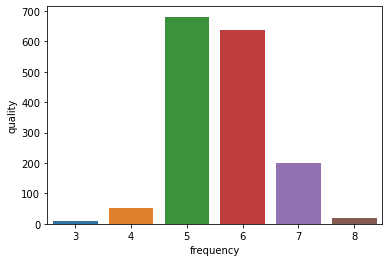

In [119]:
# Our label Distribution (countplot)
sns.barplot(cnt.index,cnt.values)
plt.xlabel('frequency')
plt.ylabel('quality')
plt.show()

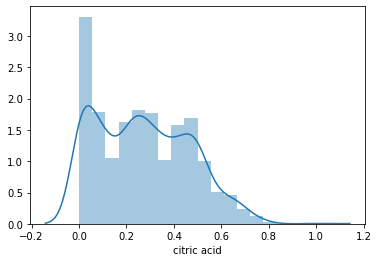

In [103]:
sns.distplot(data['citric acid'])

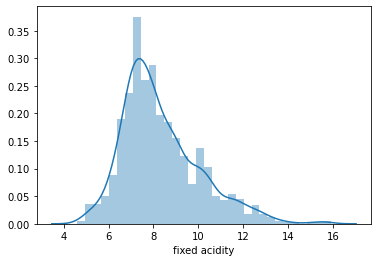

In [104]:
sns.distplot(data['fixed acidity'])
plt.show()

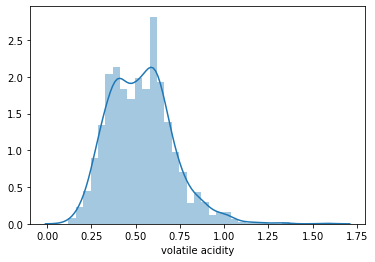

In [105]:
sns.distplot(data['volatile acidity'])
plt.show()

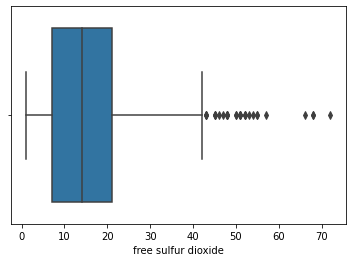

In [120]:
sns.boxplot(data['free sulfur dioxide'])
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [121]:
# Checking for duplciate values
data.duplicated().sum()

240

In [122]:
# Dropping the duplicate values
data = data.drop_duplicates()

In [123]:
#Based on out count plot the classes are imablanced
#We will create a new feature called highquality with those having less than 6 of low quality
# Which is 0 and those with above 5 having 1.
data['highquality']=[1 if x >= 6 else 0 for x in data["quality"]]

In [144]:
data['highquality'].value_counts()

1    719
0    640
Name: highquality, dtype: int64

In [125]:
X,y = data.drop(['quality','highquality'],axis=1),data['highquality'].values

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.33,random_state=1)

In [ ]:
#We will f1 score as our metric for evaulation beacuse of class imbalance and few samples.

In [129]:
#scale our input features
scaler = StandardScaler()

In [186]:
scaler.fit(Xtrain)

StandardScaler()

In [187]:
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [188]:
models = [('logistic regression',LogisticRegression()),
         ('decision tree',DecisionTreeClassifier()),
         ('random forest classifier',RandomForestClassifier()),
         ('svm',SVC()),
         ('knn',KNeighborsClassifier(n_neighbors=7)),
         ('gradient boosting classifier',GradientBoostingClassifier())]

In [189]:
for name,model in models:
    model.fit(Xtrain,Ytrain)
    pred = model.predict(Xtest)
    print(name)
    print('---------')
    print('Accuracy score:',accuracy_score(Ytest,pred).round(3))
#     print(classification_report(Ytest,pred))
#     print(confusion_matrix(Ytest,pred))
    print('Precision score:',precision_score(Ytest,pred).round(3))
    print('Recall score:',recall_score(Ytest,pred).round(3))
    print('F1 score:',f1_score(Ytest,pred).round(3))
    print('-------\n')

logistic regression
---------
Accuracy score: 0.702
Precision score: 0.745
Recall score: 0.678
F1 score: 0.71
-------

decision tree
---------
Accuracy score: 0.65
Precision score: 0.676
Recall score: 0.674
F1 score: 0.675
-------

random forest classifier
---------
Accuracy score: 0.702
Precision score: 0.743
Recall score: 0.682
F1 score: 0.711
-------

svm
---------
Accuracy score: 0.713
Precision score: 0.763
Recall score: 0.678
F1 score: 0.718
-------

knn
---------
Accuracy score: 0.71
Precision score: 0.724
Recall score: 0.748
F1 score: 0.736
-------

gradient boosting classifier
---------
Accuracy score: 0.706
Precision score: 0.743
Recall score: 0.694
F1 score: 0.718
-------



# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [ ]:
#knn is the best performing model on our test set based on the f1 score so we select it

In [194]:
model = KNeighborsClassifier(n_neighbors=7)

In [195]:
model.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=7)

In [196]:
preds = model.predict(Xtest)

In [197]:
print('Accuracy score:',accuracy_score(Ytest,pred).round(3))
print('Precision score:',precision_score(Ytest,pred).round(3))
print('Recall score:',recall_score(Ytest,pred).round(3))
print('F1 score:',f1_score(Ytest,pred).round(3))
print('Classification report:\n',classification_report(Ytest,pred))
print('Confusion matrix:\n',confusion_matrix(Ytest,pred))


Accuracy score: 0.706
Precision score: 0.743
Recall score: 0.694
F1 score: 0.718
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69       207
           1       0.74      0.69      0.72       242

    accuracy                           0.71       449
   macro avg       0.71      0.71      0.71       449
weighted avg       0.71      0.71      0.71       449

Confusion matrix:
 [[149  58]
 [ 74 168]]


<li>
<ul>We can improve our model by engineering more features</ul>
<ul>We can also improve our model by tuning the algorithm</ul>
</li>